In [1]:
import torch
import matplotlib.pyplot as plt
from dataload import *
from models import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

NameError: name 'conv3x3' is not defined

## Parameters

Loaded image shape in tensor: torch.Size([16, 3, 224, 224])


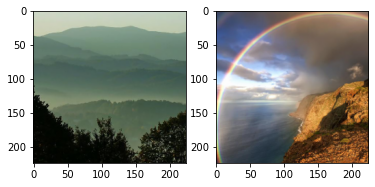

In [ ]:
batch_size = 16

train_loader = define_landscapes_loaders(batch_size, batch_size, 
                                        rescale=256,
                                        crop=224,
                                        test_set=False)

z_dim = 128

# get minibatch
x = next(iter(train_loader))
x_test = next(iter(train_loader))

print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = x_test[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

## Test trained model

RuntimeError: Error(s) in loading state_dict for Generator:
	Missing key(s) in state_dict: "res_block.0.weight", "res_block.1.weight", "res_block.1.bias", "res_block.1.running_mean", "res_block.1.running_var", "res_block.2.weight", "res_block.3.weight", "res_block.4.weight", "res_block.4.bias", "res_block.4.running_mean", "res_block.4.running_var", "res_block2.0.weight", "res_block2.1.weight", "res_block2.1.bias", "res_block2.1.running_mean", "res_block2.1.running_var", "res_block2.2.weight", "res_block2.3.weight", "res_block2.4.weight", "res_block2.4.bias", "res_block2.4.running_mean", "res_block2.4.running_var", "res_block3.0.weight", "res_block3.1.weight", "res_block3.1.bias", "res_block3.1.running_mean", "res_block3.1.running_var", "res_block3.2.weight", "res_block3.3.weight", "res_block3.4.weight", "res_block3.4.bias", "res_block3.4.running_mean", "res_block3.4.running_var", "res_block4.0.weight", "res_block4.1.weight", "res_block4.1.bias", "res_block4.1.running_mean", "res_block4.1.running_var", "res_block4.2.weight", "res_block4.3.weight", "res_block4.4.weight", "res_block4.4.bias", "res_block4.4.running_mean", "res_block4.4.running_var", "res_block5.0.weight", "res_block5.1.weight", "res_block5.1.bias", "res_block5.1.running_mean", "res_block5.1.running_var", "res_block5.2.weight", "res_block5.3.weight", "res_block5.4.weight", "res_block5.4.bias", "res_block5.4.running_mean", "res_block5.4.running_var", "res_block6.0.weight", "res_block6.1.weight", "res_block6.1.bias", "res_block6.1.running_mean", "res_block6.1.running_var", "res_block6.2.weight", "res_block6.3.weight", "res_block6.4.weight", "res_block6.4.bias", "res_block6.4.running_mean", "res_block6.4.running_var", "res_block7.0.weight", "res_block7.1.weight", "res_block7.1.bias", "res_block7.1.running_mean", "res_block7.1.running_var", "res_block7.2.weight", "res_block7.3.weight", "res_block7.4.weight", "res_block7.4.bias", "res_block7.4.running_mean", "res_block7.4.running_var". 

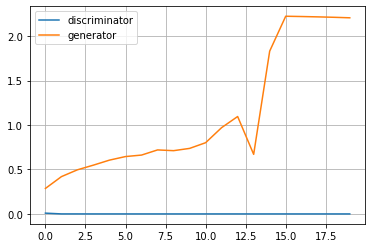

In [ ]:
import pandas as pd
fichier = "gan"


model = Generator(z_dim).to(device)
losses = pd.read_csv(f"saved_models/{fichier}.csv")
plt.plot(losses.index, losses["discriminator"], label = "discriminator")
plt.plot(losses.index, losses["generator"], label = "generator")
plt.legend()
plt.grid()
model.load_state_dict(torch.load(f"saved_models/{fichier}_generator.sav"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape : torch.Size([16, 3, 224, 224])


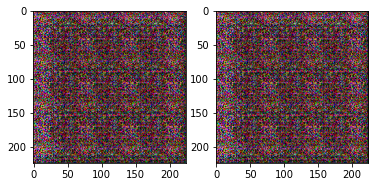

In [ ]:
x = torch.randn(batch_size, z_dim)

fig,axes = plt.subplots(1,2)
x = x.to(device)
generated = model(x)
print(f"Shape : {generated.shape}")
axes[0].imshow(generated[0].cpu().detach().numpy().transpose((1, 2, 0)))
axes[1].imshow(generated[1].cpu().detach().numpy().transpose((1, 2, 0)))